# Pymaceuticals Inc. 
---
### Analysis
- The box plot indicates that the Capomulin data is negatively skewed since the median is closer to the Q3 rather than being in the middle of Q1 and Q3. That implies that most mice treated using this medicine show high improvements in terms of lowered tumor volume, with a few mice showing less improvement. This can be a positive sign of the drug’s efficacy and might make it a preferred choice in comparison to others if the goal is to achieve the best possible outcome for the majority of patients.
- The box plot also indicates that Ramicane can be a close second given its data is more symmetrical with median being more close to the middle of Q1 and Q3, its results will show moderate improvements in most patients. Infubinol shows an outlier on the low end (below the lower whisker), it indicates that one mouse had an exceptionally good response to the drug but no conclusion should be drawn from an outlier. In case of Ceftamin, the height of the box is more than the rest which indicates variable results from the use of this  drug on mice with some showing high improvement while others only moderate. There are inconsistencies in the result of the drug which makes it a less reliable choice.
- The line plot of tumor volume vs. time point for a single mouse (l509) treated with Capomulin indicates that the drug has been fairly successful or high efficacy given that after an initial rise in the Tumor Volume and peak at 20 days, it went onto steeply decline from 48 to 40 mm3 between the days 30 and 40 with only brief miniscule increases in this duration.
- The correlation between mouse weight and the average tumor volume is 0.84. This is a value of r that is greater than 0.7 which is an indication of a strong positive correlation between the two factors for the entire Capomulin regimen. It indicates that a higher mouse weight will correspond to a higher average tumor volume.


In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
cmdf = pd.merge(study_results,mouse_metadata,
                                 how='inner', on='Mouse ID')


# Display the data table for preview
cmdf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [38]:
# Checking the number of mice.

cmdf['Mouse ID'].nunique()

249

In [39]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicates = cmdf[cmdf.duplicated(subset=["Mouse ID", 'Timepoint'], keep=False)]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates["Mouse ID"].unique()



array(['g989'], dtype=object)

In [40]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates = cmdf[cmdf.duplicated(subset=["Mouse ID", 'Timepoint'], keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cmdf_clean= cmdf[cmdf['Mouse ID'] != "g989"]

cmdf_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [42]:
# Checking the number of mice in the clean DataFrame.
cmdf_clean['Mouse ID'].nunique()

248

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
Mean_Tumor_Volume = cmdf_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
Median_Tumor_Volume = cmdf_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
Var_Tumor_Volume = cmdf_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
Std_Tumor_Volume = cmdf_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
SEM_Tumor_Volume = cmdf_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()
				
# Assemble the resulting series into a single summary DataFrame.

data = {"Mean Tumor Volume":Mean_Tumor_Volume,
                           "Median Tumor Volume": Median_Tumor_Volume,
                           "Tumor Volume Variance":Var_Tumor_Volume,
                           "Tumor Volume Std. Dev.":Std_Tumor_Volume,
                           "Tumor Volume Std. Err.":SEM_Tumor_Volume}
Summary_df= pd.DataFrame(data)
Summary_df                           

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
#({'B': ['min', 'max'], 'C': 'sum'})

cmdf_clean.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean', 'median','var', 'std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

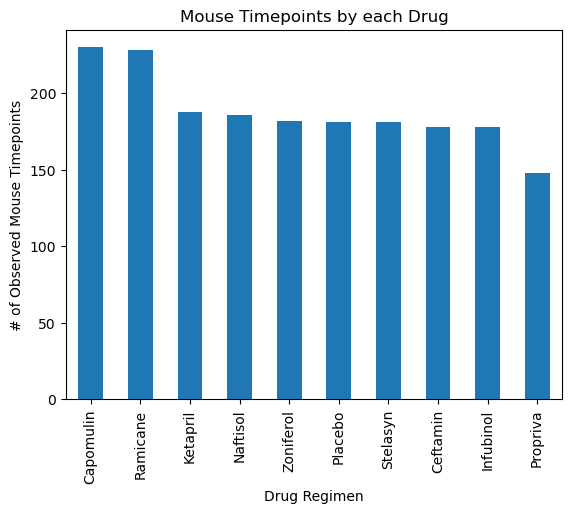

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_data= cmdf_clean.groupby('Drug Regimen')['Timepoint'].count().reset_index()
bar_data= bar_data.sort_values(by='Timepoint',ascending=False)

figure_bar = bar_data.plot(x ="Drug Regimen", y = "Timepoint", kind="bar", xlabel="Drug Regimen",
                                ylabel="# of Observed Mouse Timepoints", title="Mouse Timepoints by each Drug", legend="")



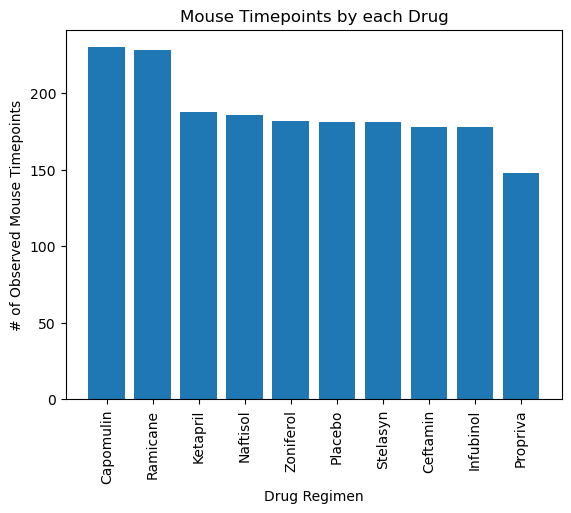

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_data= cmdf_clean.groupby('Drug Regimen')['Timepoint'].count().reset_index()
bar_data= bar_data.sort_values(by='Timepoint',ascending=False)
x_axis= bar_data["Drug Regimen"]
y_axis= bar_data["Timepoint"]
plt.bar(x_axis,y_axis, align="center")
plt.xticks( rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Mouse Timepoints by each Drug")
plt.show()

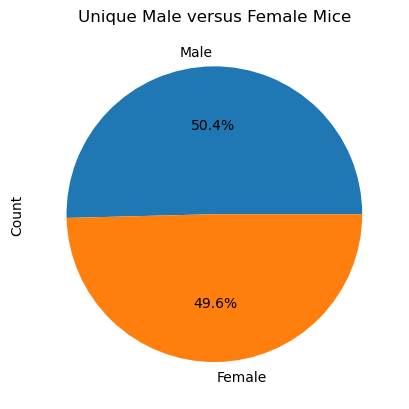

In [47]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cmdf_clean.drop_duplicates(subset=["Mouse ID"])
unique_mice_by_gender = unique_mice.groupby("Sex")["Mouse ID"].count()
unique_mice_by_gender=unique_mice_by_gender.sort_values(ascending= False)

# Make the pie chart
figure_pie= unique_mice_by_gender.plot.pie(y="Mouse ID", ylabel="Count", autopct="%1.1f%%", title="Unique Male versus Female Mice")

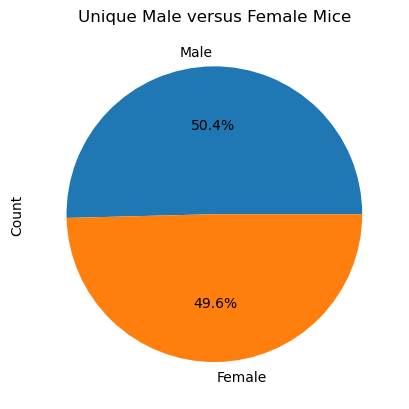

In [48]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cmdf_clean.drop_duplicates(subset=["Mouse ID"])
unique_mice_by_gender = unique_mice.groupby("Sex")["Mouse ID"].count()
unique_mice_by_gender=unique_mice_by_gender.sort_values(ascending= False)

# Make the pie chart
plt.pie(unique_mice_by_gender,labels=unique_mice_by_gender.index,
        autopct="%1.1f%%")
plt.ylabel('Count')
plt.title("Unique Male versus Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
per_mice_last_timepoint= cmdf_clean.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
per_mice_last_timepoint_tumvol = pd.merge(per_mice_last_timepoint, cmdf_clean, how="inner", on=["Mouse ID","Timepoint"])



In [50]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
 # Locate the rows which contain mice on each drug and get the tumor volumes
per_mice_last_timepoint_tumvol__4regimen = per_mice_last_timepoint_tumvol.loc[per_mice_last_timepoint_tumvol["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
tumvol__4regimen = per_mice_last_timepoint_tumvol__4regimen[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
tumvol__4regimen

# add subset

for drug in Treatments:
    
    tumor_vol_data.append(tumvol__4regimen[tumvol__4regimen["Drug Regimen"]==drug]["Tumor Volume (mm3)"])
    
 # Determine outliers using upper and lower bounds

i=0
for vol in tumor_vol_data:
    quartiles = vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{Treatments[i]}'s potential outliers:{vol[(vol>upper_bound )|(vol<lower_bound)]}")
    i=i+1
    
    
   



Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


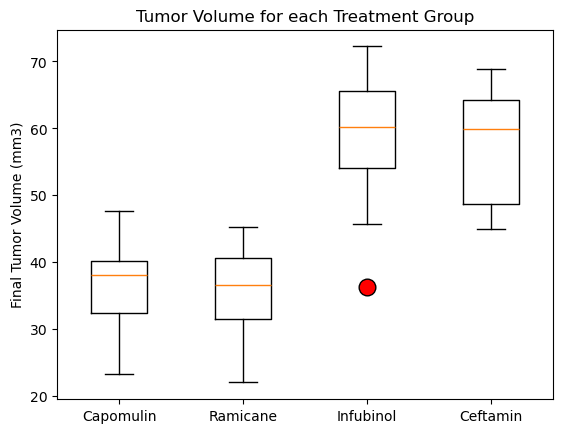

In [51]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data,labels=Treatments, flierprops=dict(markerfacecolor='red', marker='o', markersize=12) )

plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Tumor Volume for each Treatment Group")
plt.show()


## Line and Scatter Plots

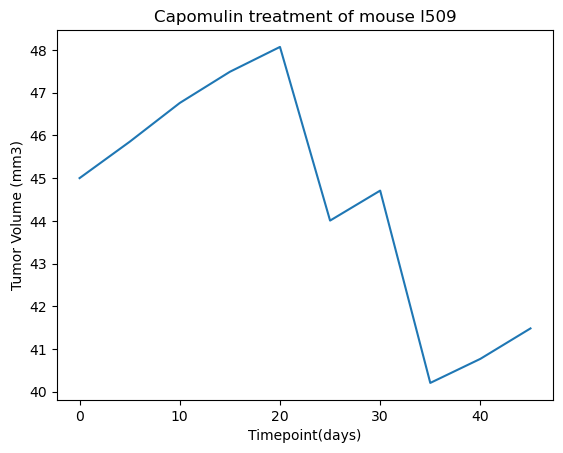

In [52]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cmdf_clean_single_mouse= cmdf_clean.loc[(cmdf_clean["Mouse ID"]=="l509") & (cmdf_clean["Drug Regimen"]=="Capomulin")]

figure_line = cmdf_clean_single_mouse.plot(x='Timepoint', y='Tumor Volume (mm3)', kind="line", xlabel="Timepoint(days)",
                                ylabel="Tumor Volume (mm3)", title="Capomulin treatment of mouse l509",legend="")

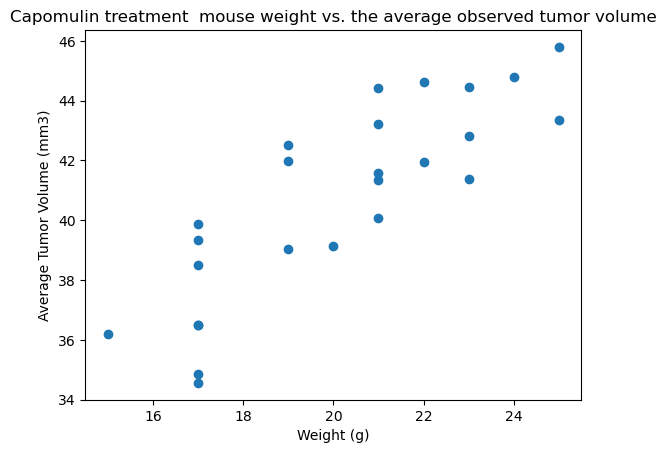

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cmdf_clean_capomulin = cmdf_clean.loc[cmdf_clean["Drug Regimen"]=="Capomulin"]
capomulin_tumvol_avgs=cmdf_clean_capomulin.groupby("Mouse ID")[["Tumor Volume (mm3)","Weight (g)"]].mean().reset_index()
capomulin_tumvol_avgs

weight = capomulin_tumvol_avgs['Weight (g)']
avg_tumor_volume = capomulin_tumvol_avgs['Tumor Volume (mm3)']
x_values = weight
y_values = avg_tumor_volume
plt.scatter(x_values,y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin treatment  mouse weight vs. the average observed tumor volume")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


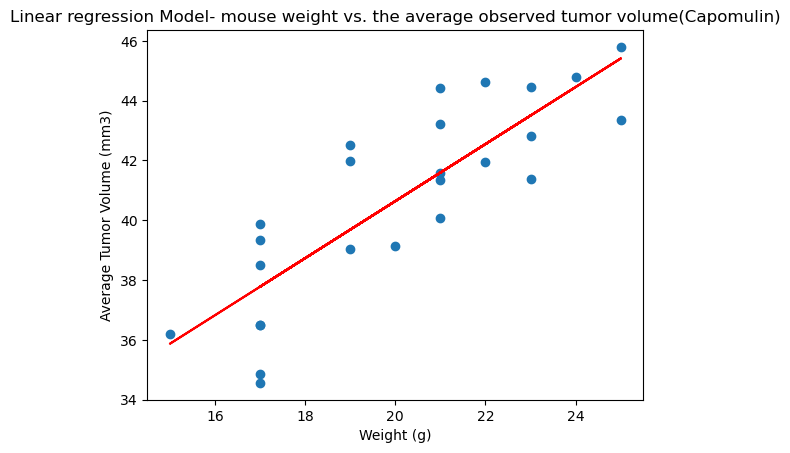

In [54]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = capomulin_tumvol_avgs['Weight (g)']
avg_tumor_volume = capomulin_tumvol_avgs['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = weight
y_values = avg_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Linear regression Model- mouse weight vs. the average observed tumor volume(Capomulin)")
plt.show()